In [1]:
import os
import shutil
import os
import imutils
import itertools
import shutil 

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

os.chdir("/student/hlodhi1/Desktop/Face_Mask_Detection/src")

In [2]:
#GPU configuration
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num of GPUs are:", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[1], True)

Num of GPUs are: 4


In [ ]:
#Creating Different Directories for Training, Validation, and Testing Dataset
Cls_mask = '/with_mask'
Cls_nomask = '/without_mask'
os.makedirs('train' + Cls_mask)
os.makedirs('train' + Cls_nomask)
os.makedirs('val' + Cls_mask)
os.makedirs('val' + Cls_nomask)
os.makedirs('test' + Cls_mask)
os.makedirs('test' + Cls_nomask)

In [4]:
#Finding No Mask images dataset in all locations
currentCls = Cls_nomask
src = "/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset"+currentCls
allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])
train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
print('Total images of No Mask: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))

Total images of No Mask:  2079
Training:  1455
Validation:  312
Testing:  312


In [7]:
#Finding Mask images dataset in all location
currentCls = Cls_mask
src = "/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset"+currentCls
allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])
train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
print('Total images of Mask: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))


Total images of Mask:  3959
Training:  2771
Validation:  594
Testing:  594


In [8]:
# Copying files into respective directories
for name in train_FileNames:
    shutil.copy(name, "/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/train"+currentCls)
for name in val_FileNames:
    shutil.copy(name, "/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/val"+currentCls)
for name in test_FileNames:
    shutil.copy(name, "/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/test"+currentCls)

In [9]:
# Renaming all the the files
for idx, filename in enumerate(os.listdir('/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/test/with_mask')):
    os.rename('/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/test/with_mask/' + f'{filename}', '/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/test/with_mask/' + 'with_mask' +f'{idx}.jpg')
for idx, filename in enumerate(os.listdir('/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/test/without_mask')):
    os.rename('/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/test/without_mask/' + f'{filename}', '/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/test/without_mask/' + 'without_mask' +f'{idx}.jpg')
for idx, filename in enumerate(os.listdir('/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/train/with_mask')):
    os.rename('/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/train/with_mask/' + f'{filename}', '/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/train/with_mask/' + 'with_mask' +f'{idx}.jpg')
for idx, filename in enumerate(os.listdir('/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/train/without_mask')):
    os.rename('/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/train/without_mask/' + f'{filename}', '/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/train/without_mask/' + 'without_mask' +f'{idx}.jpg')
for idx, filename in enumerate(os.listdir('/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/val/with_mask')):
    os.rename('/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/val/with_mask/' + f'{filename}', '/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/val/with_mask/' + 'with_mask' +f'{idx}.jpg')
for idx, filename in enumerate(os.listdir('/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/val/without_mask')):
    os.rename('/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/val/without_mask/' + f'{filename}', '/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/val/without_mask/' + 'without_mask' +f'{idx}.jpg')

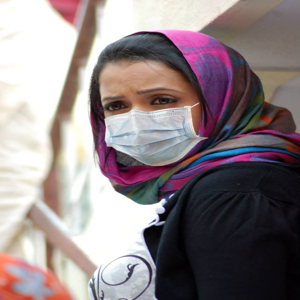

In [4]:
#Visualising mask image dataset
img = Image.open("/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/train/with_mask/with_mask1600.jpg")
width, height = img.size
img = img.resize((300,300))
display(img)

/student/hlodhi1/tensorflow26_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

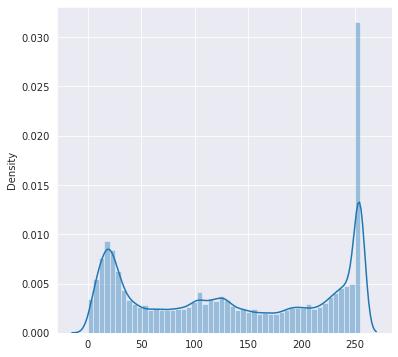

In [5]:
#Plotting mask images on grid
import seaborn as sns
from numpy import asarray
sns.set_style("darkgrid")
plt.subplots(figsize=(6,6))
a = Image.open("/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/train/with_mask/with_mask1600.jpg")
img = asarray(a)
sns.distplot(img)

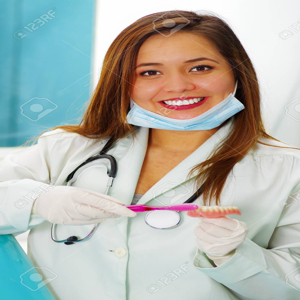

In [249]:
#Visualizing without mask dataset
img = Image.open("/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/train/without_mask/without_mask500.jpg")
width, height = img.size
img = img.resize((300,300))
display(img)

/student/hlodhi1/tensorflow26_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

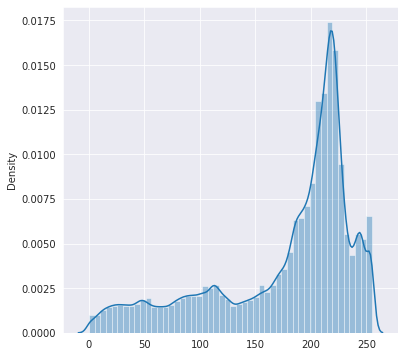

In [250]:
#Visualizing Image on grid
sns.set_style("darkgrid")
plt.subplots(figsize=(6,6))
img = Image.open("/student/hlodhi1/Desktop/Face_Mask_Detection/data/dataset/train/without_mask/without_mask500.jpg")
img = asarray(img)
sns.distplot(img)

# MobileNetV2 (Base Model)

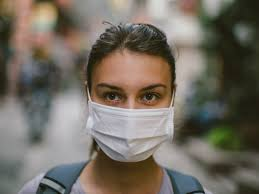

In [6]:
from IPython.display import Image
from tensorflow.keras.preprocessing import image

def image_preparation(file):
    img_path = "../data/dataset/"
    img = tf.keras.utils.load_img(img_path + file,  target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis= 0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)
Image("../data/dataset/train/with_mask/with_mask529.jpg", width=300, height=300)

/student/hlodhi1/tensorflow26_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

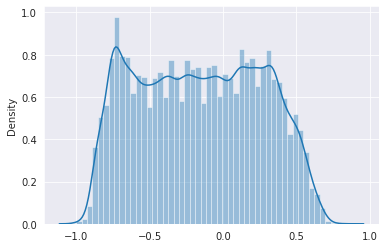

In [7]:
import seaborn as sns
preprocessed_image = image_preparation("train/with_mask/with_mask529.jpg")
img = np.squeeze(preprocessed_image)
sns.distplot(img)

In [3]:
train_datagen = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
train_generator = train_datagen.flow_from_directory(
        '../data/dataset/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        '../data/dataset/val',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)
test_generator = test_datagen.flow_from_directory(
        '../data/dataset/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

Found 4226 images belonging to 2 classes.
Found 906 images belonging to 2 classes.
Found 906 images belonging to 2 classes.


In [330]:
datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
                            rotation_range=15,
                            zoom_range=0.1,
                            width_shift_range=0.15,
                            height_shift_range=0.15,
                            shear_range=0.15,
                            horizontal_flip=True,
                            fill_mode="nearest"                             
                            )
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

train_generator = datagen.flow_from_directory(
    "../data/dataset/train", target_size = (224, 224), class_mode='categorical', batch_size = 32)

validation_generator = datagen.flow_from_directory(
    "../data/dataset/val", target_size = (224, 224), class_mode='categorical', batch_size = 32)

test_generator = test_datagen.flow_from_directory(
    "../data/dataset/test", target_size = (224, 224), class_mode='categorical', batch_size = 32)


Found 4226 images belonging to 2 classes.
Found 906 images belonging to 2 classes.
Found 906 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


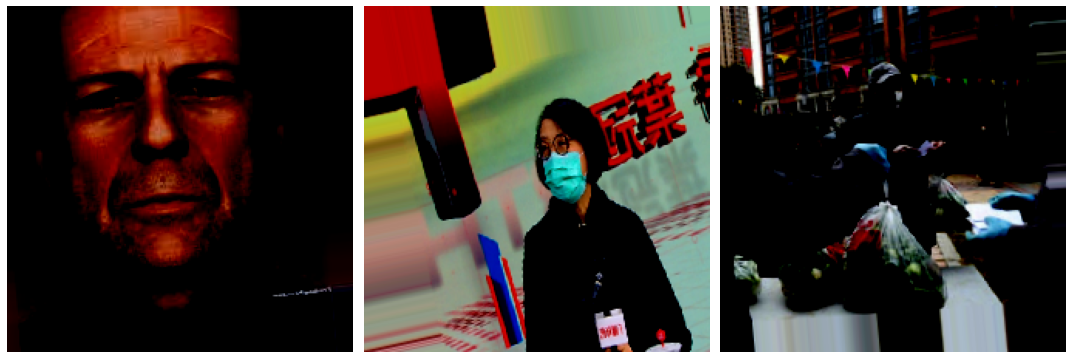

In [7]:
images, labels = next(train_generator)
def plotting_img(image_array):
    fig, ax = plt.subplots(1, 3, figsize=(15, 15))
    ax = ax.flatten()
    for img, ax in zip(image_array, ax):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()
plotting_img(images)

/student/hlodhi1/tensorflow26_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


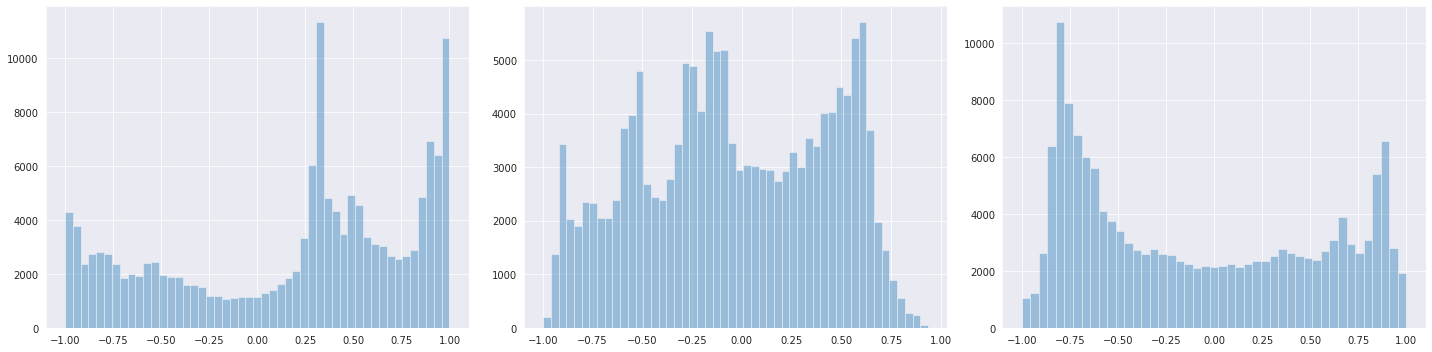

In [8]:
import seaborn as sns
sns.set_style("darkgrid")
images, labels = next(train_generator)
def plotting_img(image_array):
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    ax = ax.flatten()
    for img, ax in zip(image_array, ax):
        sns.distplot(img, kde= False,ax=ax)
    plt.tight_layout()
plotting_img(images)
plt.show()

In [9]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

2021-12-18 16:24:07.463056: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-18 16:24:09.395358: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14253 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:3d:00.0, compute capability: 8.6
2021-12-18 16:24:09.396192: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14253 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:3f:00.0, compute capability: 8.6
2021-12-18 16:24:09.396870: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

In [10]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [11]:
image_batch, label_batch = next(iter(train_generator))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

2021-12-18 16:24:19.938115: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8200


(32, 7, 7, 1280)


2021-12-18 16:24:22.181154: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [12]:
# Freezing the convolutional base
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

# Add a classification head

In [13]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [337]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [338]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [339]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [340]:
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_11 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_8   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 1280)              0         
                                                                 
 dense_27 (Dense)            (None, 1)                 128

In [341]:
initial_epochs = 10
loss0, accuracy0 = model.evaluate(validation_generator)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

29/29 [==============================] - 25s 803ms/step - loss: 0.8057 - accuracy: 0.5000
initial loss: 0.81
initial accuracy: 0.50


In [343]:
history = model.fit(train_generator,
                    epochs=initial_epochs,
                    validation_data=validation_generator)

In [4]:
def plot_model_accuracy(history_model):    
    acc = history_model.history['accuracy']
    val_acc = history_model.history['val_accuracy']
    loss = history_model.history['loss']
    val_loss = history_model.history['val_loss']
    
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()    

In [5]:
def plot_confusion_matrix1(model):    
    y_hat = model.predict(test_generator)
    y_hat = np.argmax(y_hat, axis = -1)
    y_true = test_generator.classes
    classes = ['Mask', 'No Mask']
    con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_hat).numpy()
    con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
    con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)
    figure = plt.figure(figsize=(8, 8))
    sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(classification_report(y_true,y_hat,target_names=classes))

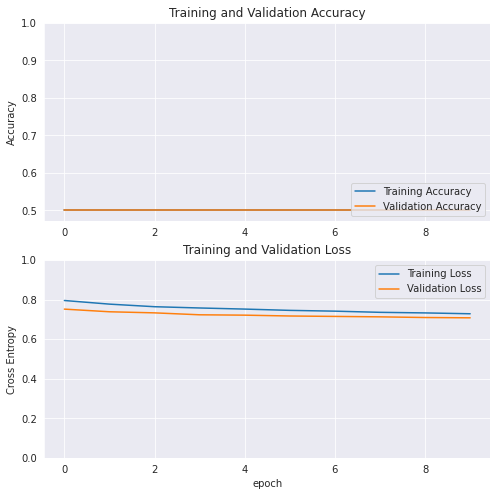

In [309]:
plot_model_accuracy(history)

### Applying Transfer Learing to get better results

In [23]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [24]:
def add_new_last_layer(base_model, nb_classes=2):

    # Get the output shape of the models last layer
    x = base_model.output
    # construct new head for the transferred model
    x = AveragePooling2D(pool_size=(7, 7))(x)
    x = Flatten(name="flatten")(x) 
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.5)(x)
    last_layer = Dense(2, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=last_layer)
    return model

In [25]:
# This will freeze the weights on all the layers except for our new dense layer
def setup_to_transfer_learn(model, base_model):
    init_lr = 0.0001
    n_epochs = 40
    """Freeze all layers and compile the model"""
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer= Adam(learning_rate=init_lr, decay=init_lr / n_epochs),
                  loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
train_model = add_new_last_layer(base_model)
setup_to_transfer_learn(train_model,base_model)

In [27]:
#Showing Trainable Layers
for i, layer in enumerate(train_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

In [20]:
import time
# Set up Tensorboard for logging models
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir(root_logdir):
    run_id = time.strftime('run::MNV2::_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir(root_logdir)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

timestamp = time.strftime('%Y_%m_%d-%H_%M_%S')
checkpoint_filepath = 'Models/MNV2_:(' + timestamp + '):.h5'
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=30,restore_best_weights=True)

In [30]:
history = train_model.fit(
    train_generator,
    epochs= 30,
    validation_data= validation_generator,
    callbacks = [checkpoint_cb,early_stopping_cb,tensorboard_cb])

/student/hlodhi1/tensorflow26_env/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/30
133/133 [==============================] - 130s 966ms/step - loss: 0.4047 - accuracy: 0.8256 - val_loss: 0.2341 - val_accuracy: 0.9128
Epoch 2/30
133/133 [==============================] - 129s 969ms/step - loss: 0.2533 - accuracy: 0.8992 - val_loss: 0.2018 - val_accuracy: 0.9305
Epoch 3/30
133/133 [==============================] - 129s 974ms/step - loss: 0.1953 - accuracy: 0.9274 - val_loss: 0.1777 - val_accuracy: 0.9327
Epoch 4/30
133/133 [==============================] - 129s 976ms/step - loss: 0.1851 - accuracy: 0.9335 - val_loss: 0.1719 - val_accuracy: 0.9338
Epoch 5/30
133/133 [==============================] - 127s 959ms/step - loss: 0.1842 - accuracy: 0.9337 - val_loss: 0.1682 - val_accuracy: 0.9415
Epoch 6/30
133/133 [==============================] - 129s 969ms/step - loss: 0.1757 - accuracy: 0.9349 - val_loss: 0.1612 - val_accuracy: 0.9437
Epoch 7/30
133/133 [==============================] - 129s 970ms/step - loss: 0.1577 - accuracy: 0.9418 - val_loss: 0.1577 -

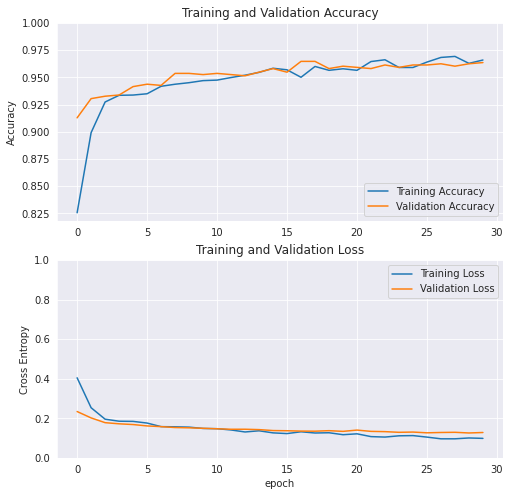

In [34]:
plot_model_accuracy(history)

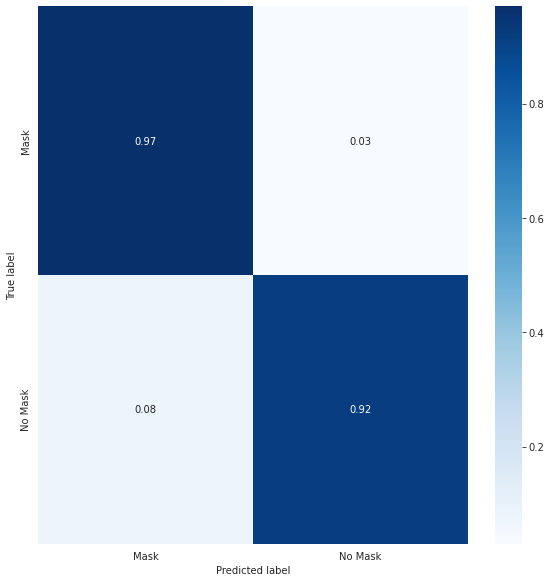

              precision    recall  f1-score   support

        Mask       0.96      0.97      0.97       594
     No Mask       0.95      0.92      0.93       312

    accuracy                           0.95       906
   macro avg       0.95      0.95      0.95       906
weighted avg       0.95      0.95      0.95       906



In [36]:
import pandas as pd
plot_confusion_matrix1(train_model)

In [136]:
from tensorflow import keras
model = keras.models.load_model("Models/")
# train_model.save('Models/')

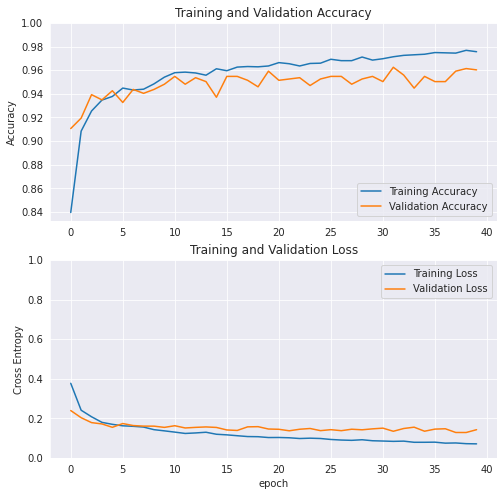

In [363]:
plot_model_accuracy(history)

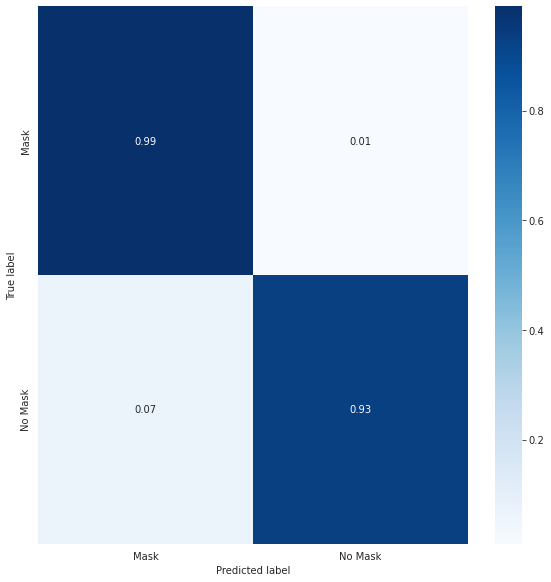

              precision    recall  f1-score   support

        Mask       0.97      0.99      0.98       594
     No Mask       0.98      0.93      0.95       312

    accuracy                           0.97       906
   macro avg       0.97      0.96      0.97       906
weighted avg       0.97      0.97      0.97       906



In [143]:
plot_confusion_matrix1(train_model)

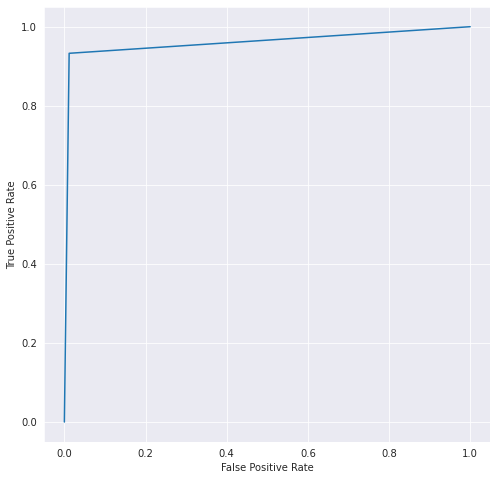

In [147]:
fpr, tpr, thresholds = roc_curve(y_true,y_hat)
def plot_roc_curve(fpr,tpr):
        plt.subplots(figsize=(8,8))
        plt.plot(fpr,tpr) 
        plt.xlabel('False Positive Rate')  
        plt.ylabel('True Positive Rate')  
        plt.show()

plot_roc_curve(fpr, tpr)     

# Data Processing for Convolution Neural Network and VGG16

In [38]:
#Augmenting and Generating Images for the model using VGG16 Preprocessing function
datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                            rotation_range=15,
                            zoom_range=0.1,
                            width_shift_range=0.15,
                            height_shift_range=0.15,
                            shear_range=0.15,
                            horizontal_flip=True,
                            fill_mode="nearest"                             
                            )

test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
train_generator = datagen.flow_from_directory(
    "../data/dataset/train", target_size = (224, 224), classes = ["with_mask", "without_mask"], batch_size = 32)

validation_generator = datagen.flow_from_directory(
    "../data/dataset/val", target_size = (224, 224), classes = ["with_mask", "without_mask"], batch_size = 32)

test_generator = test_datagen.flow_from_directory(
    "../data/dataset/test", target_size = (224, 224), classes = ["with_mask", "without_mask"], batch_size = 32)


Found 4226 images belonging to 2 classes.
Found 906 images belonging to 2 classes.
Found 906 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


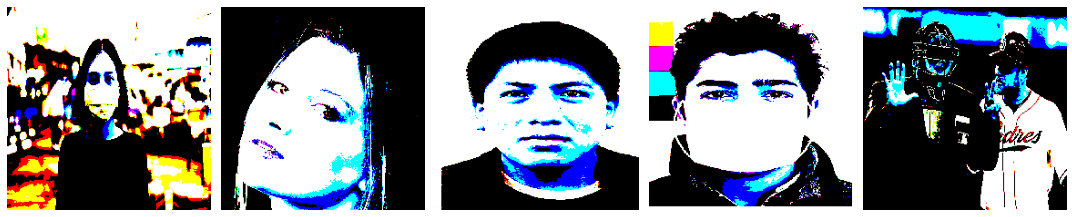

In [9]:
#Visualizing images generated using Image generator
images, labels = next(train_generator)
def plotting_img(image_array):
    fig, ax = plt.subplots(1, 5, figsize=(15, 15))
    ax = ax.flatten()
    for img, ax in zip(image_array, ax):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()
plotting_img(images)

/student/hlodhi1/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


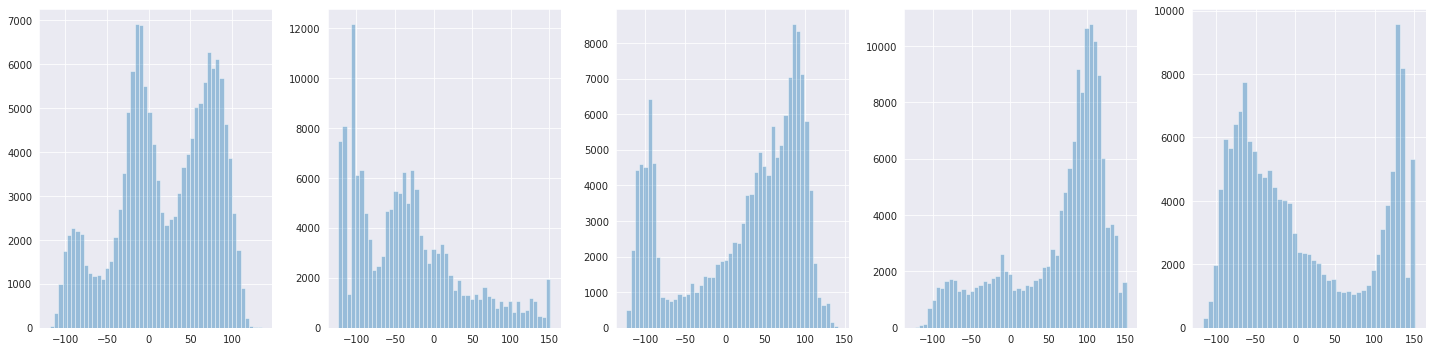

In [81]:
#Visualizing images on the grid

sns.set_style("darkgrid")
images, labels = next(train_generator)
def plotting_img(image_array):
    fig, ax = plt.subplots(1, 5, figsize=(20, 5))
    ax = ax.flatten()
    for img, ax in zip(image_array, ax):
        sns.distplot(img, kde= False,ax=ax)
        # ax.axis("off")
    plt.tight_layout()
    plt.show()
plotting_img(images)
plt.show()

# Builing Convolution Neural Network

In [6]:
cnn_model = Sequential([
    Conv2D(filters= 128, kernel_size=(3,3), padding='same', activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2), strides=2), #Cutting Image dimensions into half
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

2021-12-18 22:30:18.343731: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-18 22:30:20.334421: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14253 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:3d:00.0, compute capability: 8.6
2021-12-18 22:30:20.335331: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14253 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:3f:00.0, compute capability: 8.6
2021-12-18 22:30:20.335994: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

In [7]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 32)       0

In [8]:
cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = cnn_model.fit(x=train_generator, validation_data=validation_generator,epochs=20)

Epoch 1/20


2021-12-18 22:30:47.956688: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8200
2021-12-18 22:30:50.673187: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


133/133 [==============================] - 135s 982ms/step - loss: 0.5543 - accuracy: 0.7172 - val_loss: 0.4555 - val_accuracy: 0.7815
Epoch 2/20
133/133 [==============================] - 128s 960ms/step - loss: 0.4594 - accuracy: 0.7937 - val_loss: 0.3807 - val_accuracy: 0.8488
Epoch 3/20
133/133 [==============================] - 127s 958ms/step - loss: 0.4489 - accuracy: 0.7965 - val_loss: 0.3758 - val_accuracy: 0.8532
Epoch 4/20
133/133 [==============================] - 126s 947ms/step - loss: 0.4244 - accuracy: 0.8230 - val_loss: 0.3668 - val_accuracy: 0.8565
Epoch 5/20
133/133 [==============================] - 122s 920ms/step - loss: 0.4093 - accuracy: 0.8247 - val_loss: 0.3407 - val_accuracy: 0.8620
Epoch 6/20
133/133 [==============================] - 128s 962ms/step - loss: 0.3988 - accuracy: 0.8296 - val_loss: 0.3398 - val_accuracy: 0.8642
Epoch 7/20
133/133 [==============================] - 126s 949ms/step - loss: 0.3968 - accuracy: 0.8353 - val_loss: 0.3484 - val_accura

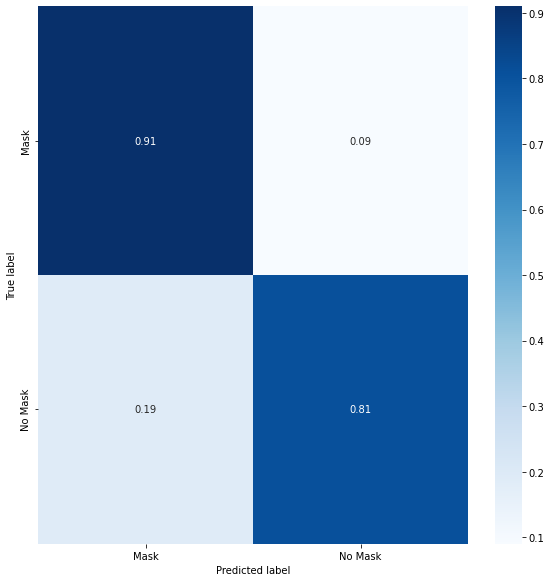

              precision    recall  f1-score   support

        Mask       0.90      0.91      0.91       594
     No Mask       0.83      0.81      0.82       312

    accuracy                           0.88       906
   macro avg       0.87      0.86      0.86       906
weighted avg       0.88      0.88      0.88       906



In [12]:
#Confusion Matrix of convolution Netural Network
plot_confusion_matrix1(cnn_model)

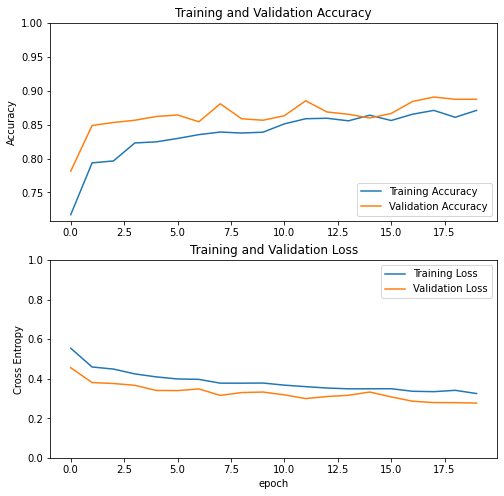

In [13]:
#Confusion Matrix of convolution Netural Network
plot_model_accuracy(history)

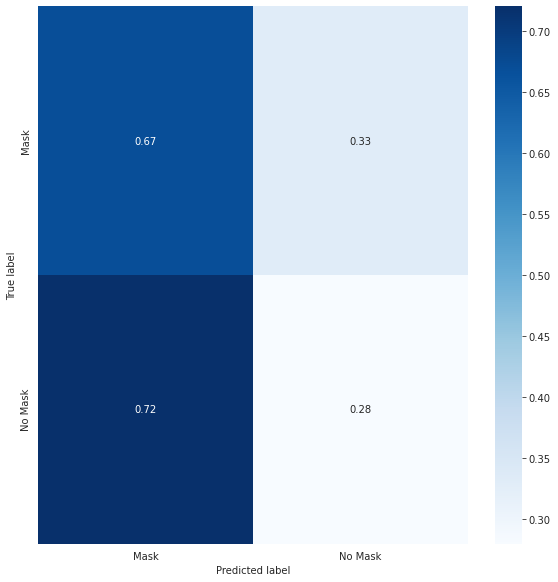

              precision    recall  f1-score   support

        Mask       0.64      0.67      0.65       594
     No Mask       0.31      0.28      0.29       312

    accuracy                           0.53       906
   macro avg       0.47      0.47      0.47       906
weighted avg       0.52      0.53      0.53       906



In [213]:
#CAccuracy report of convolution Netural Network
plot_confusion_matrix1(cnn_model)

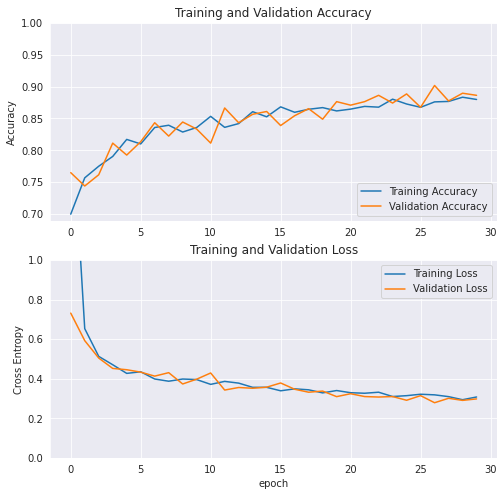

In [218]:
#Accuracy report of Convolution Neural Network
plot_model_accuracy(history)

# VGG16

In [39]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [40]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [41]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer) #Building New Model by droppig the last one

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [43]:
for layer in model.layers:
    layer.trainable = False # Freezing all the layers in model

In [44]:
model.add(Dense(units= 2, activation='softmax')) # Adding new last layer for prediction

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [46]:
#Training fine-tuned VGG16 model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
import time
# Set up Tensorboard for logging models
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir(root_logdir):
    run_id = time.strftime('run::VGG::_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir(root_logdir)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

timestamp = time.strftime('%Y_%m_%d-%H_%M_%S')
checkpoint_filepath = 'Models/VGG16_:(' + timestamp + '):.h5'
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)

history = model.fit(    
        train_generator,
        epochs= 30,
        validation_data= validation_generator,
        callbacks = [checkpoint_cb,early_stopping_cb,tensorboard_cb]
)

Epoch 1/30
133/133 [==============================] - 135s 1s/step - loss: 0.4349 - accuracy: 0.8171 - val_loss: 0.3516 - val_accuracy: 0.8786
Epoch 2/30
133/133 [==============================] - 131s 986ms/step - loss: 0.3704 - accuracy: 0.8580 - val_loss: 0.3055 - val_accuracy: 0.8985
Epoch 3/30
133/133 [==============================] - 134s 1s/step - loss: 0.3455 - accuracy: 0.8668 - val_loss: 0.2879 - val_accuracy: 0.8918
Epoch 4/30
133/133 [==============================] - 130s 976ms/step - loss: 0.3261 - accuracy: 0.8791 - val_loss: 0.2796 - val_accuracy: 0.8974
Epoch 5/30
133/133 [==============================] - 134s 1s/step - loss: 0.3160 - accuracy: 0.8786 - val_loss: 0.2777 - val_accuracy: 0.8885
Epoch 6/30
133/133 [==============================] - 124s 936ms/step - loss: 0.3091 - accuracy: 0.8786 - val_loss: 0.2785 - val_accuracy: 0.8929
Epoch 7/30
133/133 [==============================] - 131s 982ms/step - loss: 0.3050 - accuracy: 0.8857 - val_loss: 0.2555 - val_accu

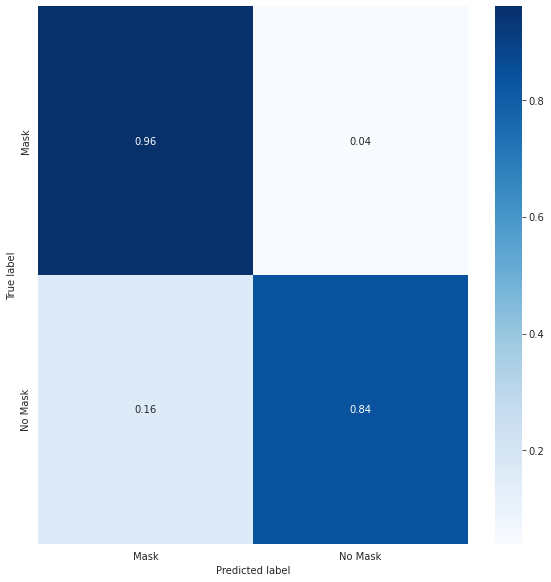

              precision    recall  f1-score   support

        Mask       0.92      0.96      0.94       594
     No Mask       0.92      0.84      0.88       312

    accuracy                           0.92       906
   macro avg       0.92      0.90      0.91       906
weighted avg       0.92      0.92      0.92       906



In [54]:
#Cnfusion Matrix of VGG16 after Transfer Learning
plot_confusion_matrix1(model)

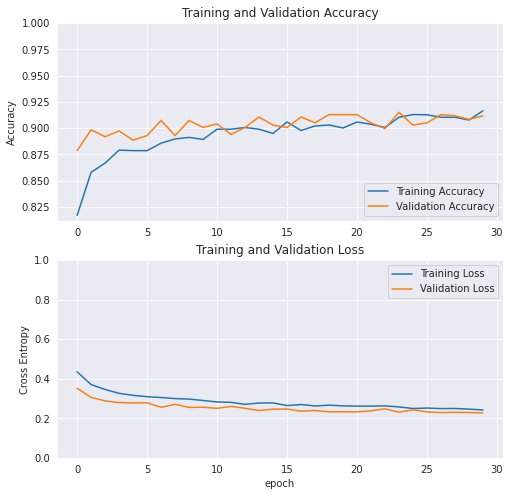

In [55]:
#Accuracy and Validatin graph of VGG16 after Transfer Learning
plot_model_accuracy(history)

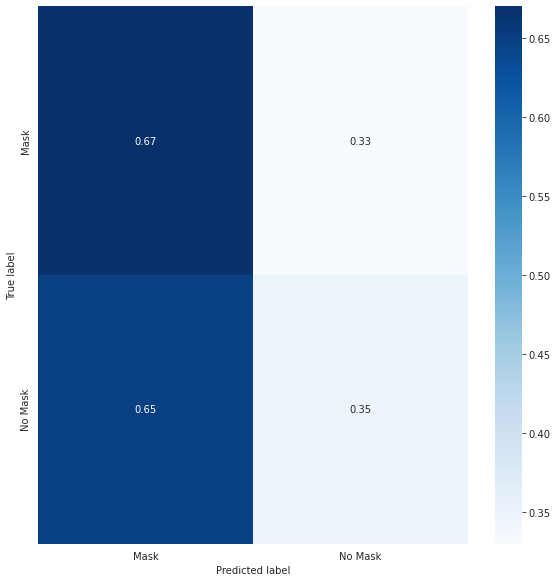

              precision    recall  f1-score   support

        Mask       0.66      0.67      0.67       594
     No Mask       0.36      0.35      0.36       312

    accuracy                           0.56       906
   macro avg       0.51      0.51      0.51       906
weighted avg       0.56      0.56      0.56       906



In [49]:
#Cnfusion Matrix of VGG16 without Transfer Learning
plot_confusion_matrix1(model)

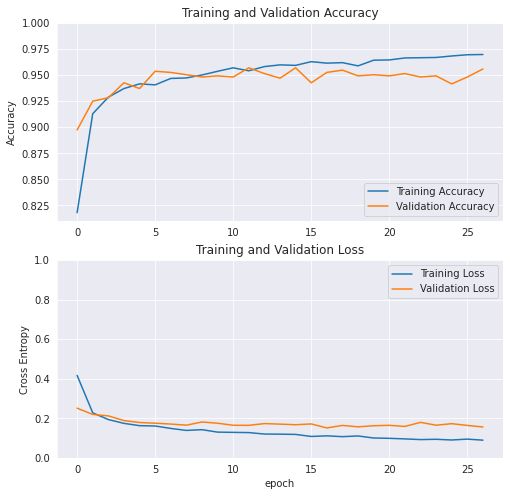

In [50]:
#Accuracy and Validatin graph of VGG16 without Transfer Learning
plot_model_accuracy(history)

In [ ]:
%pwd

# Realtime Detection over Camera

In [ ]:
import time
import cv2
import imutils
from imutils.video import VideoStream
from tensorflow.keras.models import load_model

def detect_and_predict_mask(frame, faceNet, maskNet):
	# grab the dimensions of the frame and then construct a blob
	# from it
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300),
		(104.0, 177.0, 123.0))
	# pass the blob through the network and obtain the face detections
	faceNet.setInput(blob)
	detections = faceNet.forward()
	# initialize our list of faces, their corresponding locations,
	# and the list of predictions from our face mask network
	faces = []
	locs = []
	preds = []
    # loop over the detections
	for i in range(0, detections.shape[2]):
		# extract the confidence (i.e., probability) associated with
		# the detection
		confidence = detections[0, 0, i, 2]
		# filter out weak detections by ensuring the confidence is
		# greater than the minimum confidence
		if confidence > 0.5:
			# compute the (x, y)-coordinates of the bounding box for
			# the object
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")
			# ensure the bounding boxes fall within the dimensions of
			# the frame
			(startX, startY) = (max(0, startX), max(0, startY))
			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))
        	# extract the face ROI, convert it from BGR to RGB channel
			# ordering, resize it to 224x224, and preprocess it
			face = frame[startY:endY, startX:endX]
			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
			face = cv2.resize(face, (224, 224))
			face = img_to_array(face)
			face = preprocess_input(face)
			# add the face and bounding boxes to their respective
			# lists
			faces.append(face)
			locs.append((startX, startY, endX, endY))
    	# only make a predictions if at least one face was detected
	if len(faces) > 0:
		# for faster inference we'll make batch predictions on *all*
		# faces at the same time rather than one-by-one predictions
		# in the above `for` loop
		faces = np.array(faces, dtype="float32")
		preds = maskNet.predict(faces, batch_size=32)
	# return a 2-tuple of the face locations and their corresponding
	# locations
	return (locs, preds)

 
faceNet = "face_detector/"  
maskNet = "./Models/MNV2_:(2021_12_18-16_24_57):.h5"

# load our serialized face detector model from disk
print("[INFO] loading face detector model...")
prototxtPath = os.path.sep.join([faceNet, "deploy.prototxt"])
weightsPath = os.path.sep.join([faceNet,
	"res10_300x300_ssd_iter_140000.caffemodel"])
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

# load the face mask detector model from disk
print("[INFO] loading face mask detector model...")
maskNet = load_model(maskNet)

# initialize the video stream and allow the camera sensor to warm up
print("[INFO] starting video stream...")
vs = VideoStream(1).start()
time.sleep(2.0)

# loop over the frames from the video stream
while True:
    try:
        # grab the frame from the threaded video stream and resize it
        # to have a maximum width of 400 pixels
        frame = vs.read()
        frame = imutils.resize(frame, width=400)

        # detect faces in the frame and determine if they are wearing a
        # face mask or not
        (locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)

        # loop over the detected face locations and their corresponding
        # locations
        for (box, pred) in zip(locs, preds):
            # unpack the bounding box and predictions
            (startX, startY, endX, endY) = box
            (mask, withoutMask) = pred

            # determine the class label and color we'll use to draw
            # the bounding box and text
            label = "Mask" if mask > withoutMask else "No Mask"
            color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

            # include the probability in the label
            label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

            # display the label and bounding box rectangle on the output
            # frame
            cv2.putText(frame, label, (startX, startY - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
            cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)

        # show the output frame
        cv2.imshow("Frame", frame)
        key = cv2.waitKey(1) & 0xFF

        # if the `q` key was pressed, break from the loop
        if key == ord("q"):
            break
    except:# include the probability in the label
        pass

# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()